<a href="https://colab.research.google.com/github/Ragervic/Machine-Learning-Projects/blob/main/MagicGamma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


In [ ]:
cols =["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df=pd.read_csv("magic04.data",names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [ ]:
df["class"] = (df["class"] == "g").astype(int)

In [ ]:
df["class"].head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

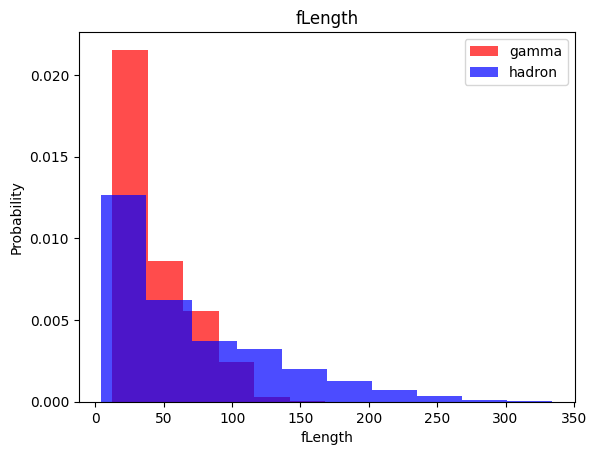

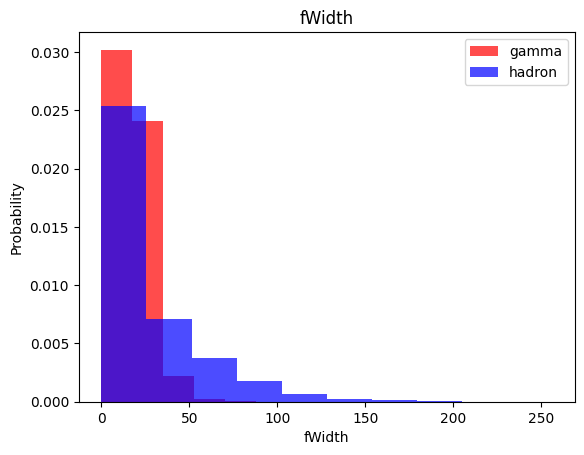

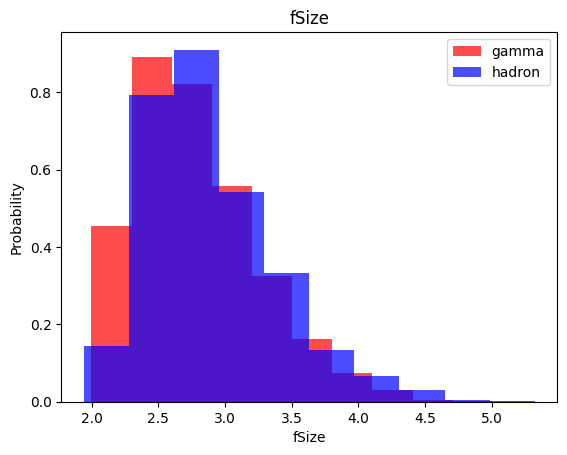

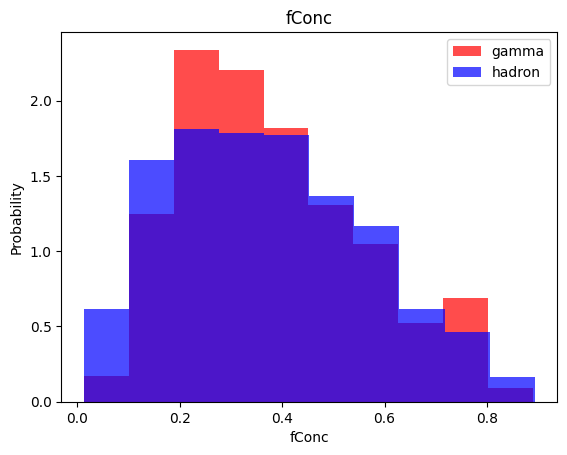

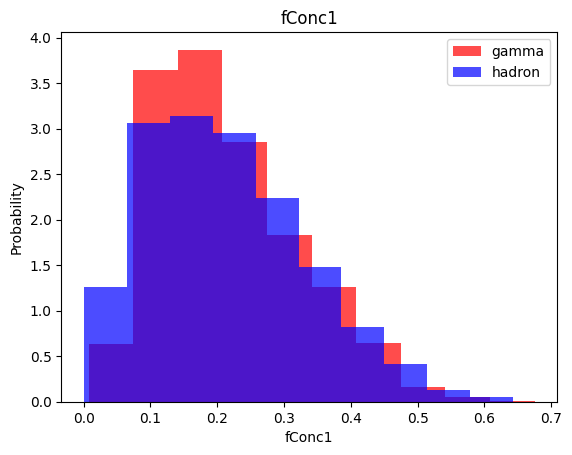

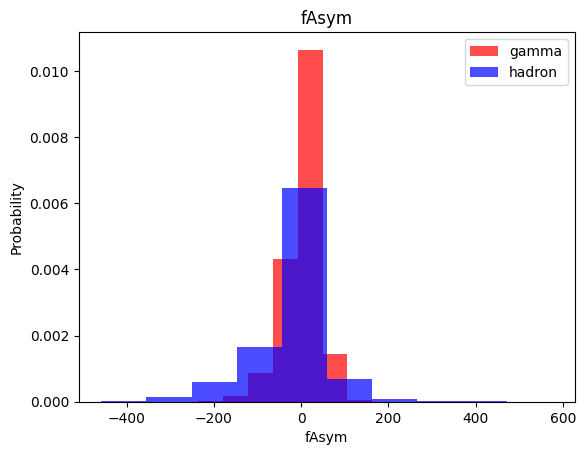

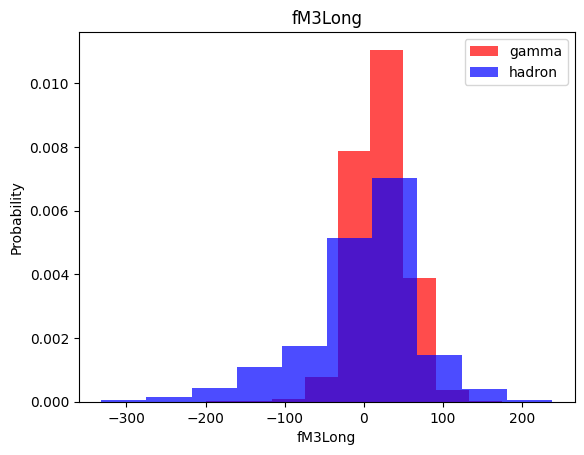

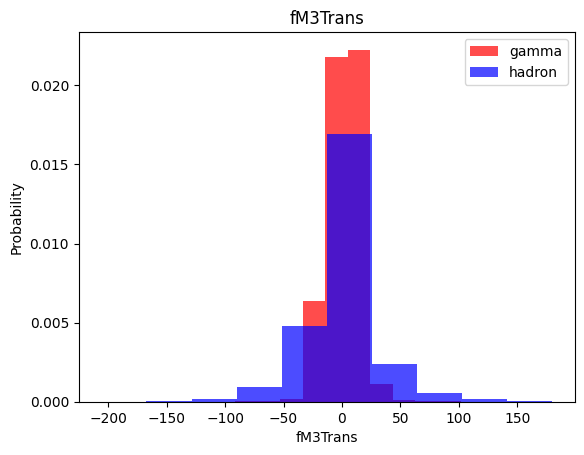

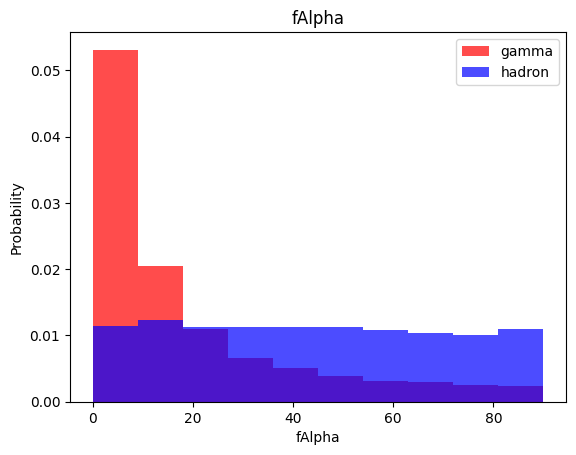

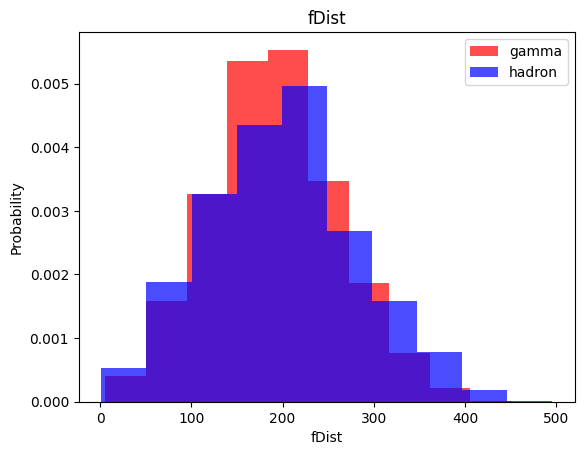

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label],density=True,alpha=0.7,color="red",label="gamma")
  plt.hist(df[df["class"]==0][label],density=True,alpha=0.7,color="blue",label="hadron")
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()


Train , validation and test datasets

In [ ]:
train,valid,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
def scale_dataset(dataframe,oversample=False):
  x=dataframe[dataframe.columns[:-1]].values
  y=dataframe[dataframe.columns[-1]].values

  # scaling the dataset
  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  # oversampling=resampling to ensure datasets are equivalent
  if oversample:
    ros=RandomOverSampler()
    x,y = ros.fit_resample(x,y)

  # data=np.hstack(x,y)
  # but y needs to be two dimensional
  # np.reshape(y,(-1,1)) or  np.reshape(y,(len(y),1))
  data=np.hstack((x,np.reshape(y,(-1,1))))
  return data,x,y



In [ ]:
train,x_train,y_train = scale_dataset(train,oversample=True)
valid,x_valid,y_valid = scale_dataset(valid,oversample=False)
test,x_test,y_test = scale_dataset(test,oversample=False)


K-Nearest Neighbors model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model = knn_model.fit(x_train,y_train)

In [ ]:
y_pred = knn_model.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1333
           1       0.86      0.85      0.85      2471

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



In [ ]:
y_test

array([1, 1, 1, ..., 1, 1, 1])

Naive Bayes Model



In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train,y_train)

In [ ]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.41      0.51      1333
           1       0.74      0.89      0.81      2471

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.66      3804
weighted avg       0.71      0.72      0.70      3804



Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_model = LogisticRegression()
lr_model = lr_model.fit(x_train,y_train)

In [ ]:
y_pred = lr_model.predict(x_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.73      0.67      0.70      1436
           1       0.81      0.85      0.83      2368

    accuracy                           0.78      3804
   macro avg       0.77      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



Support Vector Machines

In [ ]:
from sklearn.svm import SVC

In [ ]:
sv_model = SVC()
sv_model = sv_model.fit(x_train,y_train)

In [ ]:
y_pred = sv_model.predict(x_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1333
           1       0.90      0.90      0.90      2471

    accuracy                           0.87      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804



Neural Networks Model

In [ ]:
import tensorflow as tf


In [ ]:
def plot_history(history):
  fig, (ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
  ax1.plot(history.history['loss'],label='loss')
  ax1.plot(history.history['val_loss'],label='val_loss')
  ax1.set_ylabel('Binary_crossentropy')
  ax1.set_xlabel('Epoch')

  ax2.plot(history.history['accuracy'],label='accuracy')
  ax2.plot(history.history['val_accuracy'],label='val_accuracy')
  ax2.set_ylabel('Accuracy')
  ax2.set_xlabel('Epoch')

  plt.legend()
  plt.grid(True)
  plt.show()



In [ ]:
def train_model(x_train,y_train,num_nodes,batch_size,epochs,learn_rate,dropout_prob):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(32,activation='relu',input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(32,activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1,activation='sigmoid')
    ])
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(learn_rate),loss='binary_crossentropy',metrics=['accuracy'])
  # fitting dataset to the model
  history = nn_model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_split=0.2,verbose=0)
  return nn_model , history


16 nodes,0 dropout,0.01 learning rate,32 batch size


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


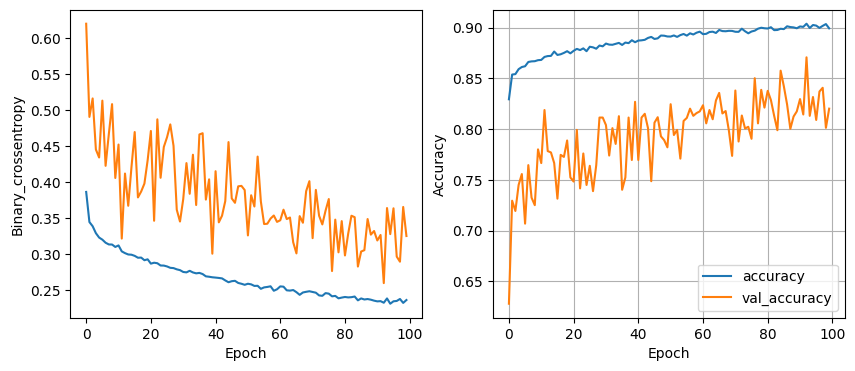

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8597 - loss: 0.3894
16 nodes,0 dropout,0.01 learning rate,64 batch size


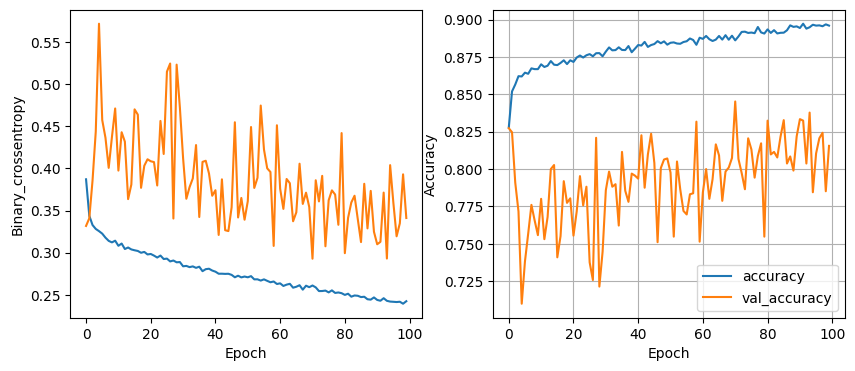

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8597 - loss: 0.3696
16 nodes,0 dropout,0.01 learning rate,128 batch size


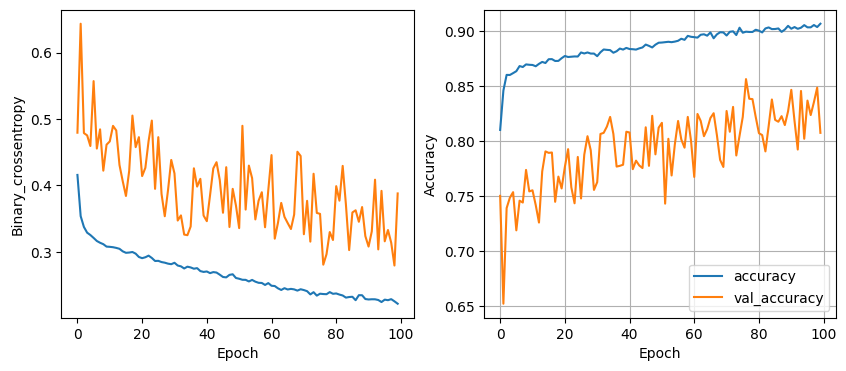

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8642 - loss: 0.3848
16 nodes,0 dropout,0.005 learning rate,32 batch size


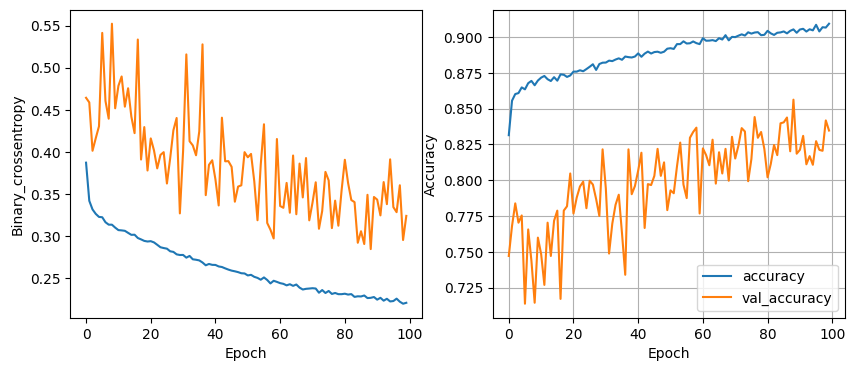

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8527 - loss: 0.3808
16 nodes,0 dropout,0.005 learning rate,64 batch size


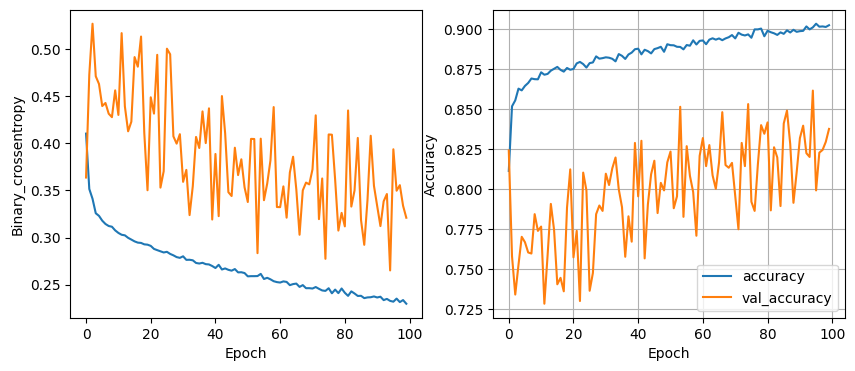

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8602 - loss: 0.3706
16 nodes,0 dropout,0.005 learning rate,128 batch size


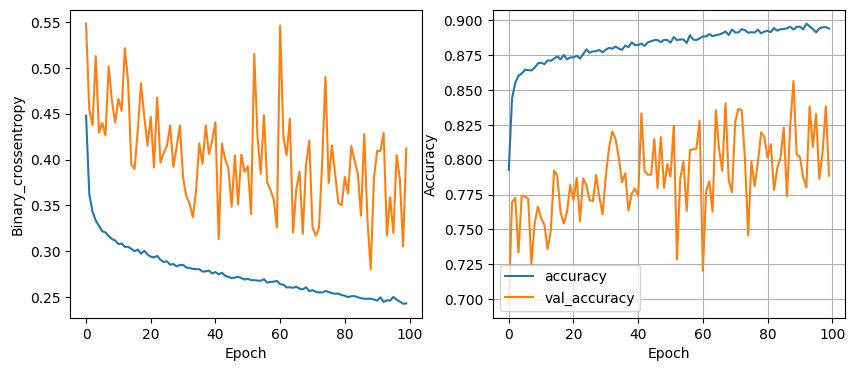

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8632 - loss: 0.3638
16 nodes,0 dropout,0.001 learning rate,32 batch size


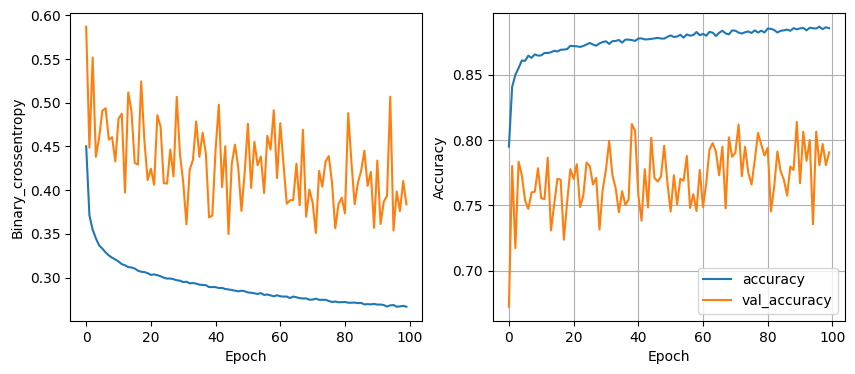

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8662 - loss: 0.3205
16 nodes,0 dropout,0.001 learning rate,64 batch size


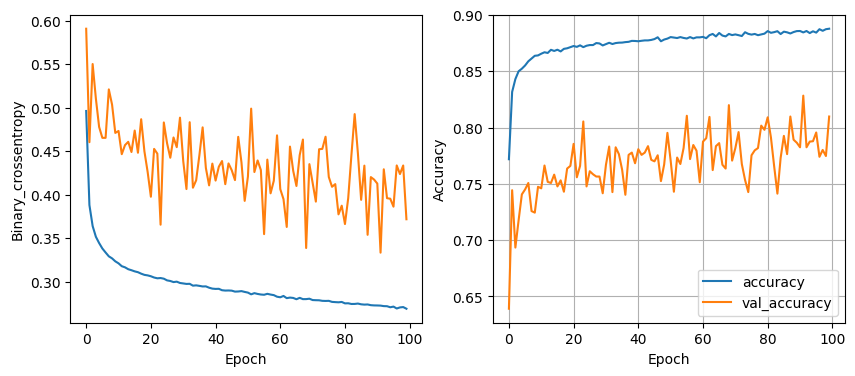

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8709 - loss: 0.3191
16 nodes,0 dropout,0.001 learning rate,128 batch size


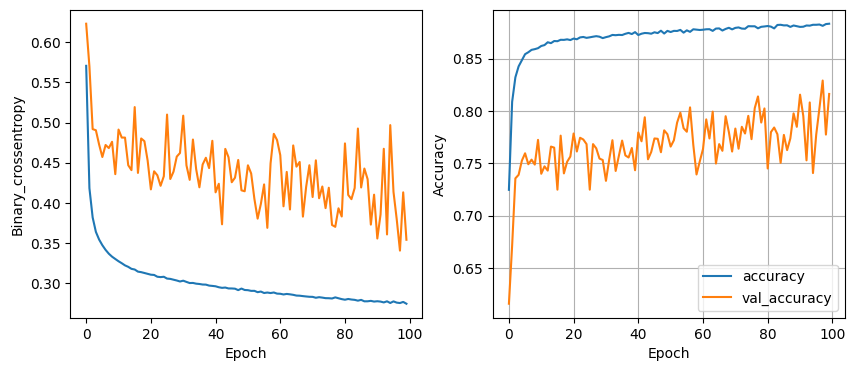

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8768 - loss: 0.3109
16 nodes,0.2 dropout,0.01 learning rate,32 batch size


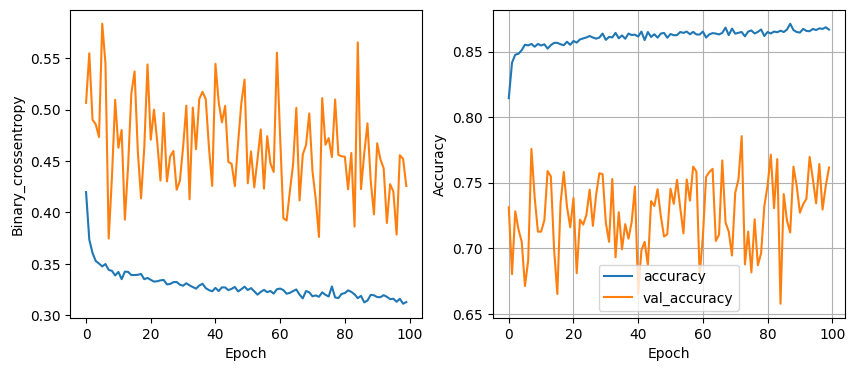

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8674 - loss: 0.3112
16 nodes,0.2 dropout,0.01 learning rate,64 batch size


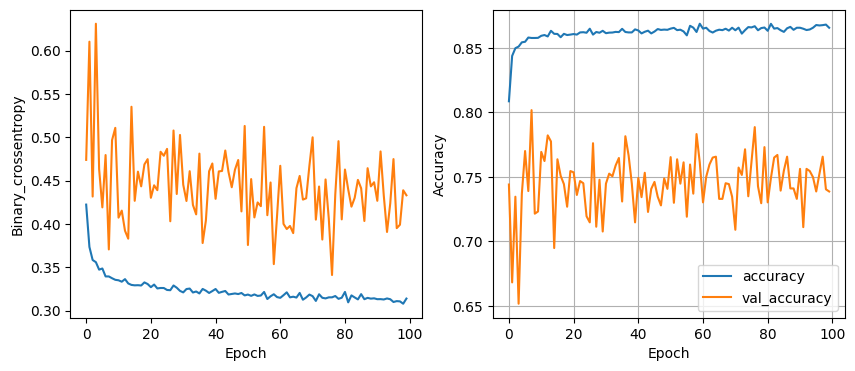

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8647 - loss: 0.3134
16 nodes,0.2 dropout,0.01 learning rate,128 batch size


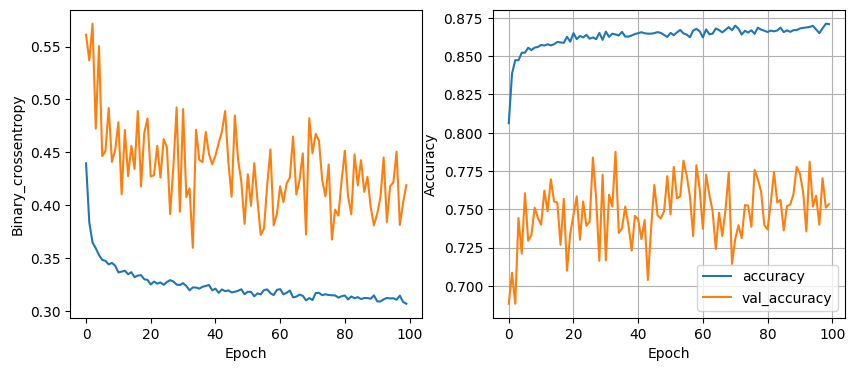

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8686 - loss: 0.3135
16 nodes,0.2 dropout,0.005 learning rate,32 batch size


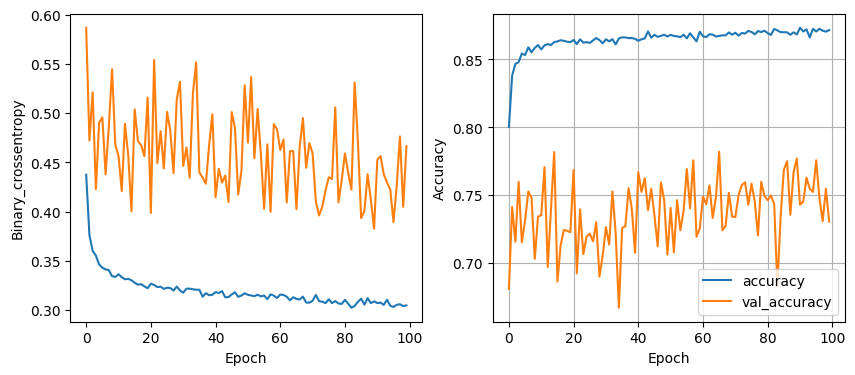

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8667 - loss: 0.3131
16 nodes,0.2 dropout,0.005 learning rate,64 batch size


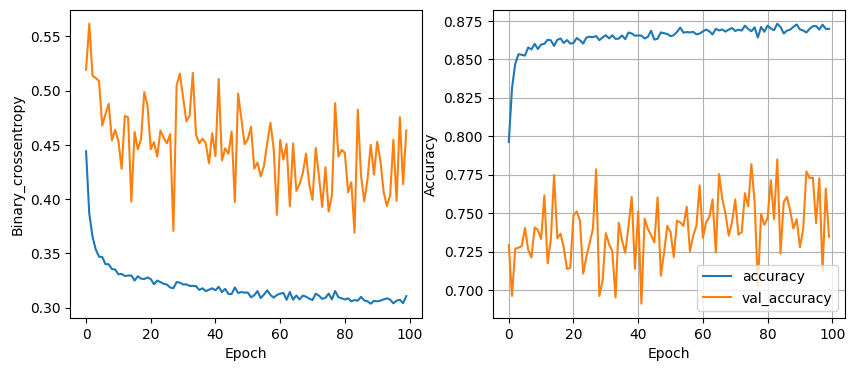

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8710 - loss: 0.3106
16 nodes,0.2 dropout,0.005 learning rate,128 batch size


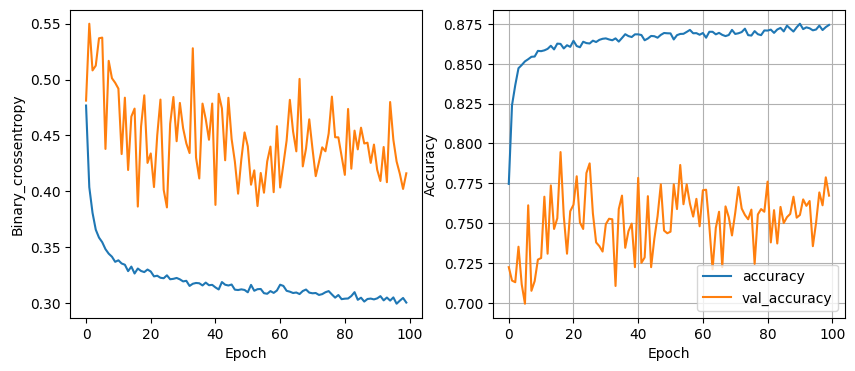

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8708 - loss: 0.3076
16 nodes,0.2 dropout,0.001 learning rate,32 batch size


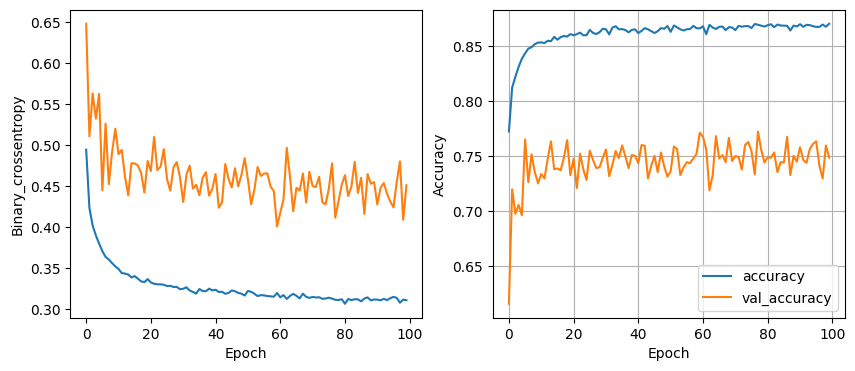

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8686 - loss: 0.3135
16 nodes,0.2 dropout,0.001 learning rate,64 batch size


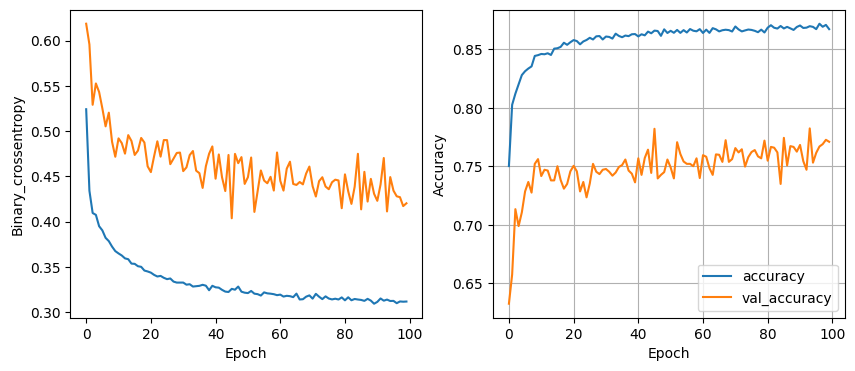

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8681 - loss: 0.3107
16 nodes,0.2 dropout,0.001 learning rate,128 batch size


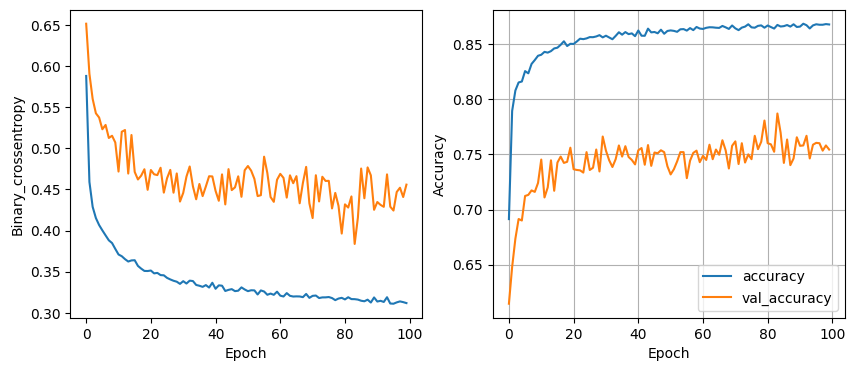

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8656 - loss: 0.3103
32 nodes,0 dropout,0.01 learning rate,32 batch size


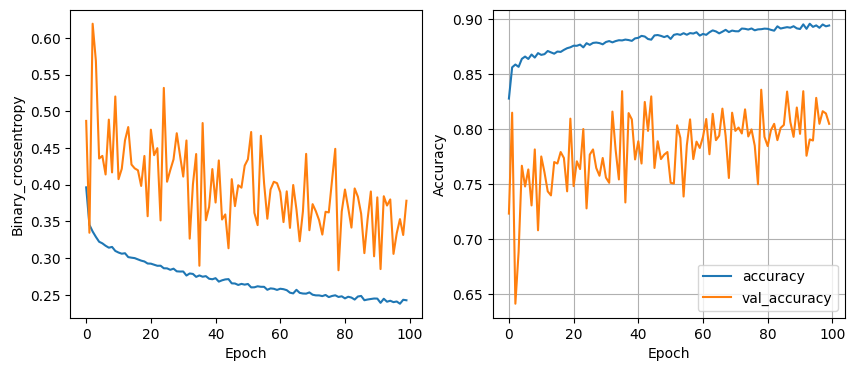

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8644 - loss: 0.3869
32 nodes,0 dropout,0.01 learning rate,64 batch size


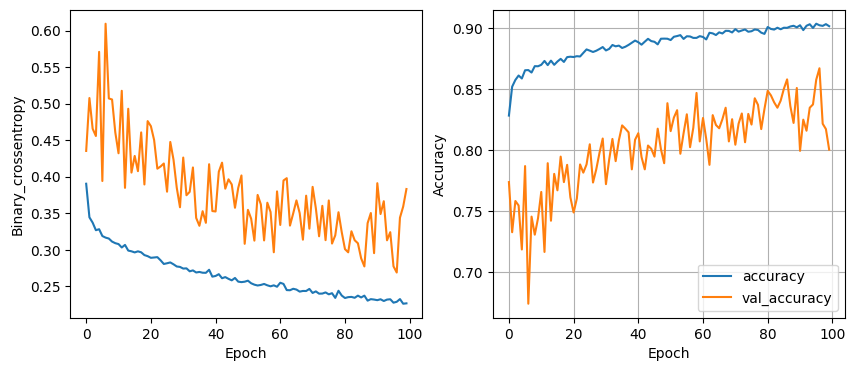

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8587 - loss: 0.4129
32 nodes,0 dropout,0.01 learning rate,128 batch size


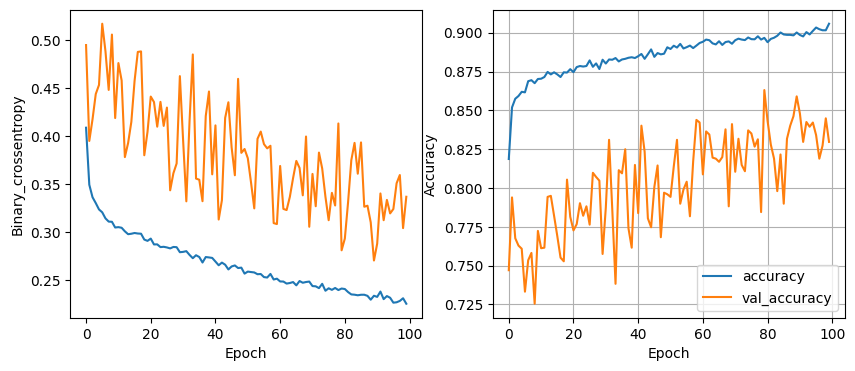

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8679 - loss: 0.3614
32 nodes,0 dropout,0.005 learning rate,32 batch size


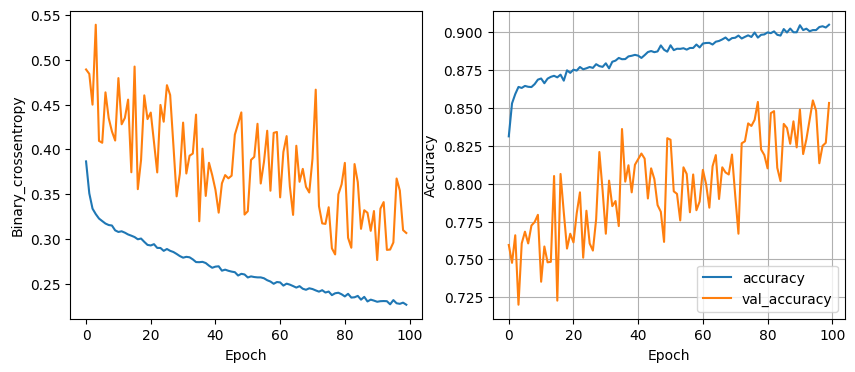

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8691 - loss: 0.4106
32 nodes,0 dropout,0.005 learning rate,64 batch size


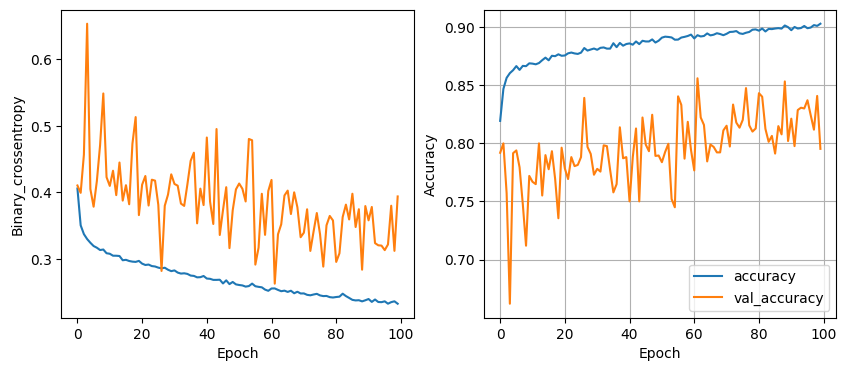

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8665 - loss: 0.3466
32 nodes,0 dropout,0.005 learning rate,128 batch size


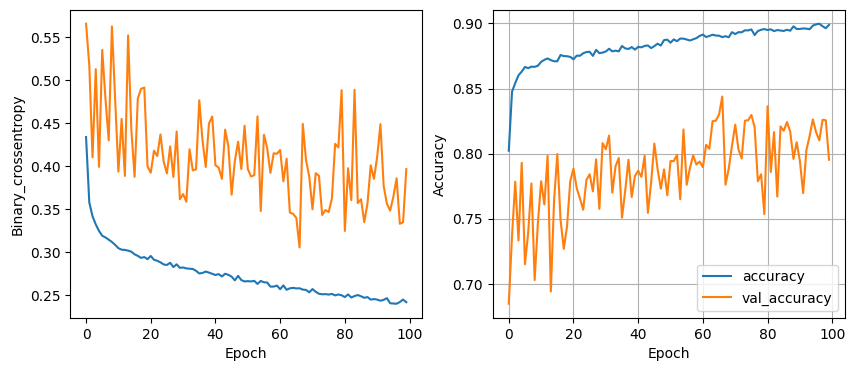

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8699 - loss: 0.3391
32 nodes,0 dropout,0.001 learning rate,32 batch size


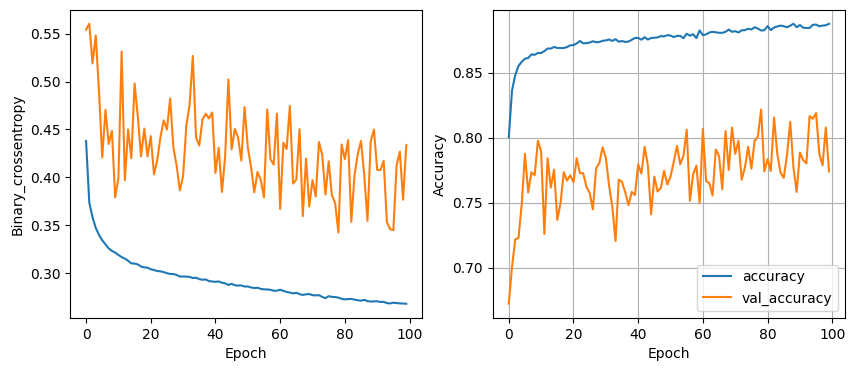

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8635 - loss: 0.3296
32 nodes,0 dropout,0.001 learning rate,64 batch size


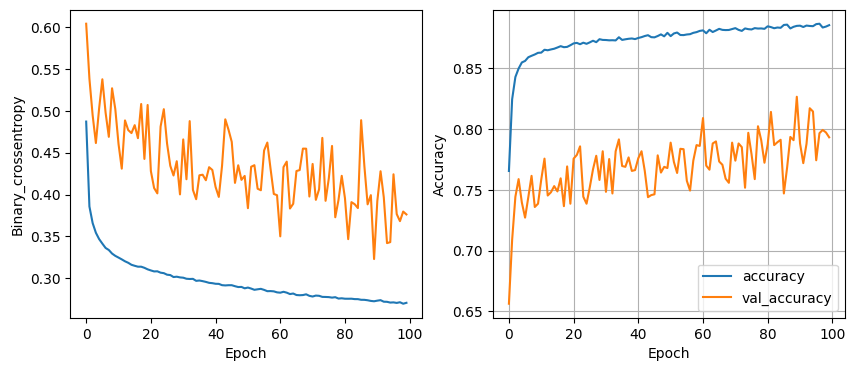

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8654 - loss: 0.3272
32 nodes,0 dropout,0.001 learning rate,128 batch size


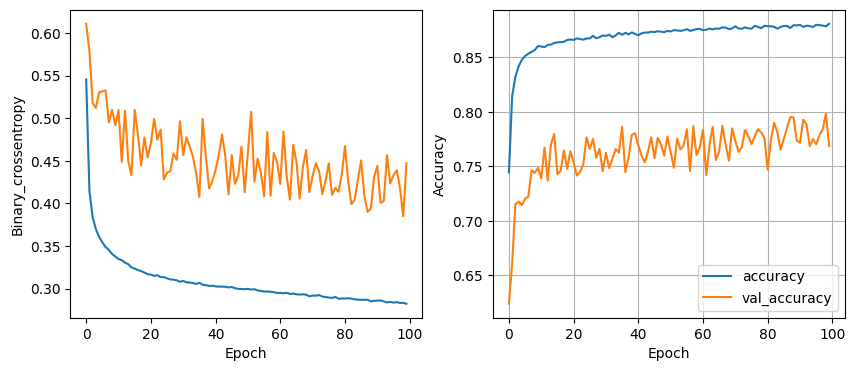

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8680 - loss: 0.3174
32 nodes,0.2 dropout,0.01 learning rate,32 batch size


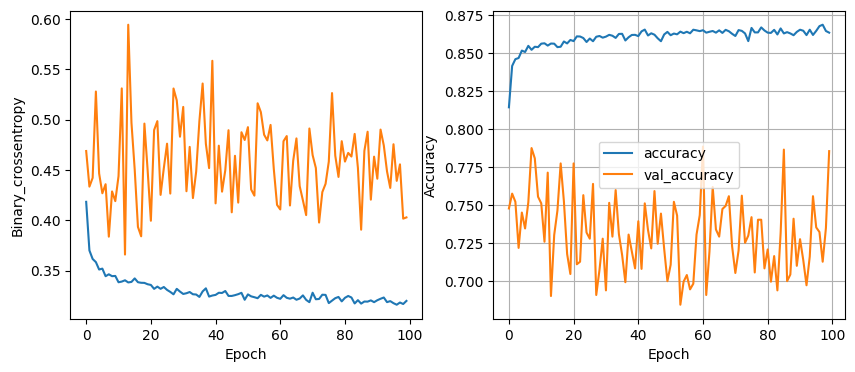

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8649 - loss: 0.3123
32 nodes,0.2 dropout,0.01 learning rate,64 batch size


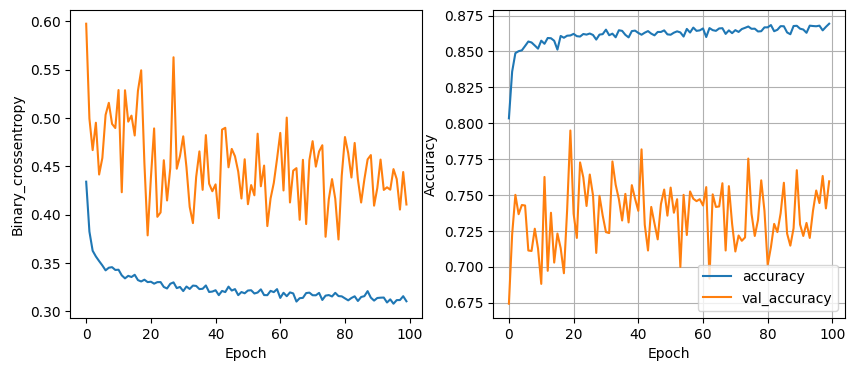

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8725 - loss: 0.3134
32 nodes,0.2 dropout,0.01 learning rate,128 batch size


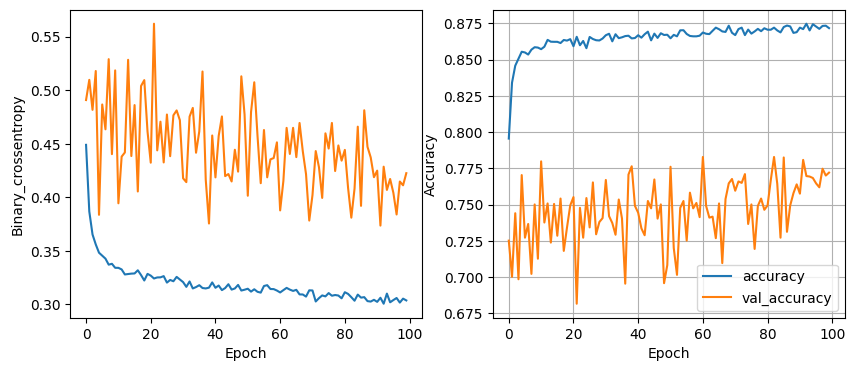

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8710 - loss: 0.3080
32 nodes,0.2 dropout,0.005 learning rate,32 batch size


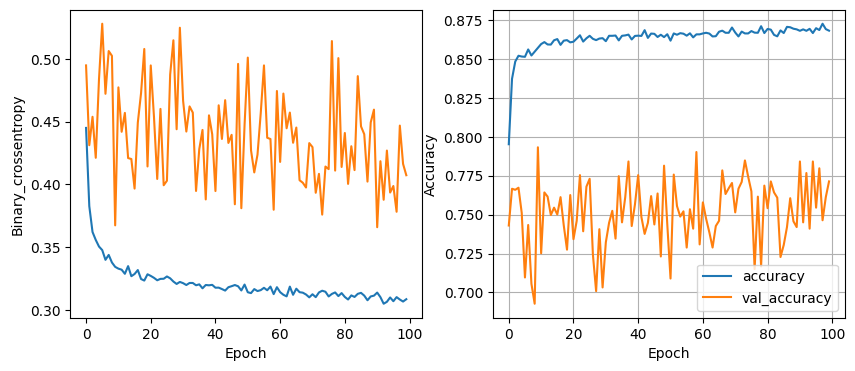

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8716 - loss: 0.3010
32 nodes,0.2 dropout,0.005 learning rate,64 batch size


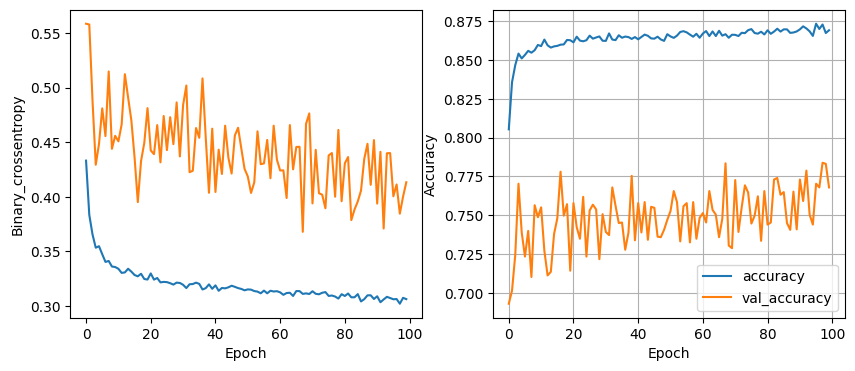

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8666 - loss: 0.3072
32 nodes,0.2 dropout,0.005 learning rate,128 batch size


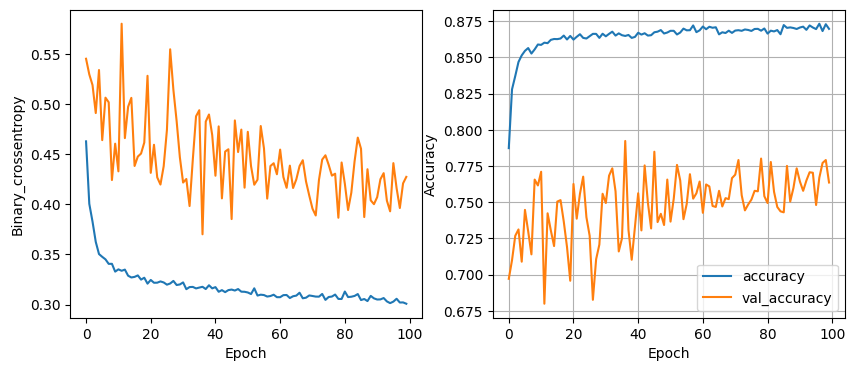

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8740 - loss: 0.3033
32 nodes,0.2 dropout,0.001 learning rate,32 batch size


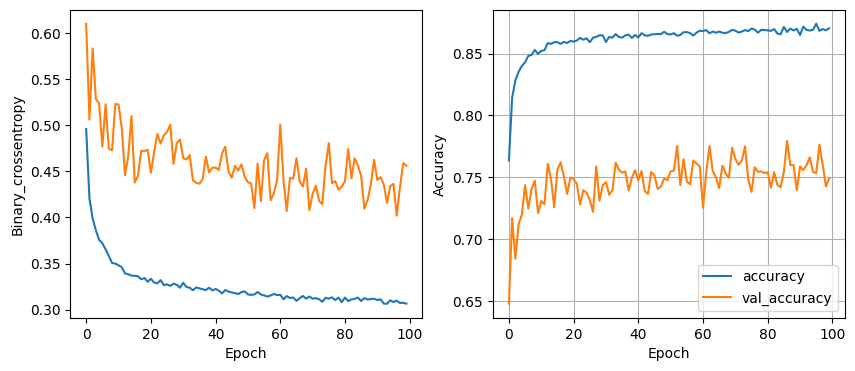

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8653 - loss: 0.3119
32 nodes,0.2 dropout,0.001 learning rate,64 batch size


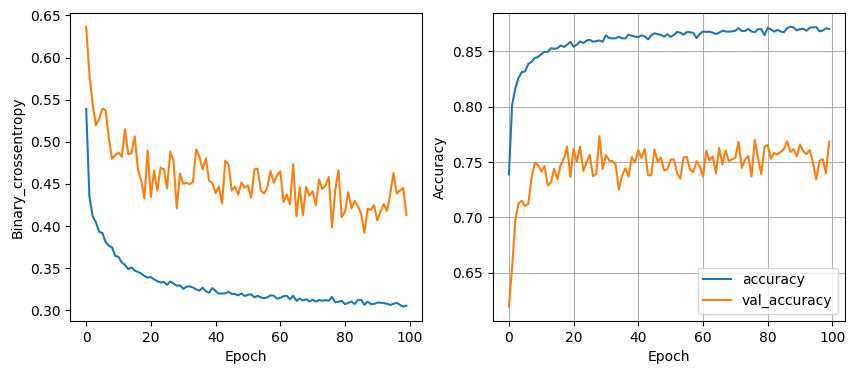

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8696 - loss: 0.3098
32 nodes,0.2 dropout,0.001 learning rate,128 batch size


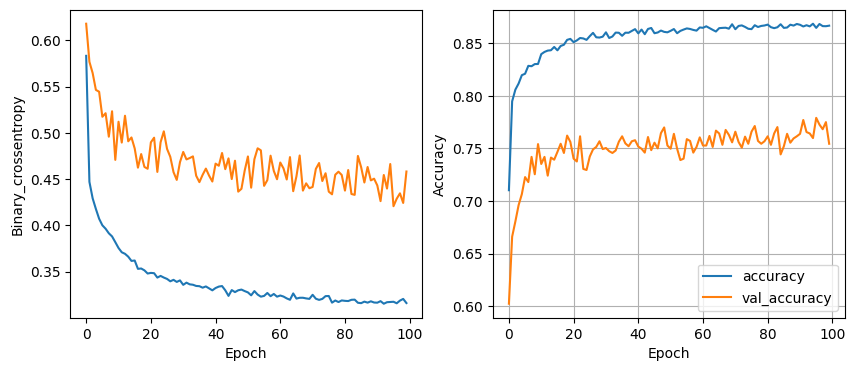

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8681 - loss: 0.3104
64 nodes,0 dropout,0.01 learning rate,32 batch size


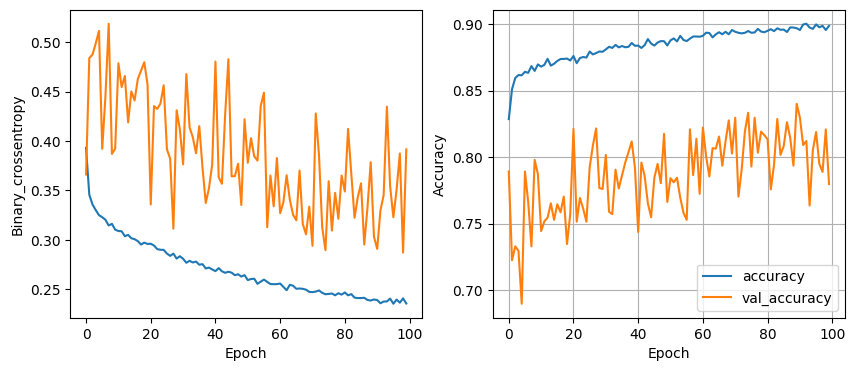

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8640 - loss: 0.3655
64 nodes,0 dropout,0.01 learning rate,64 batch size


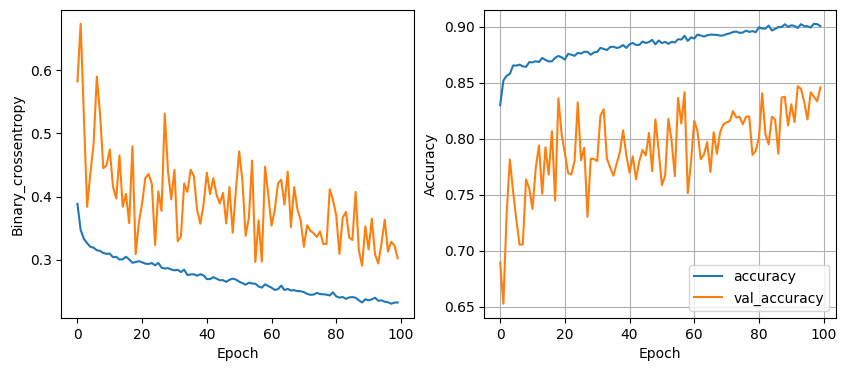

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8631 - loss: 0.3855
64 nodes,0 dropout,0.01 learning rate,128 batch size


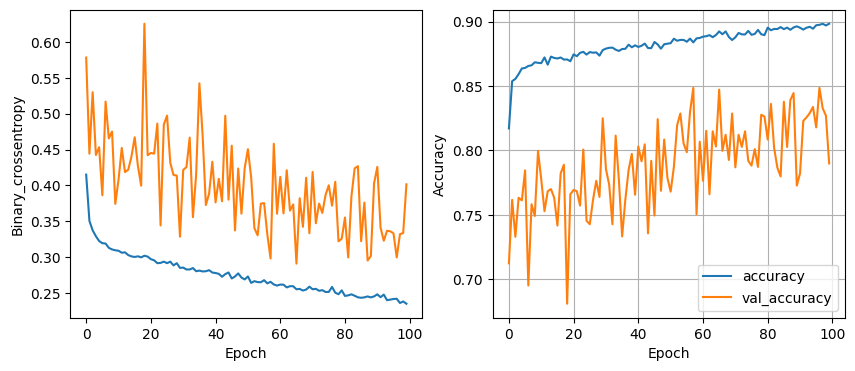

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8538 - loss: 0.3877
64 nodes,0 dropout,0.005 learning rate,32 batch size


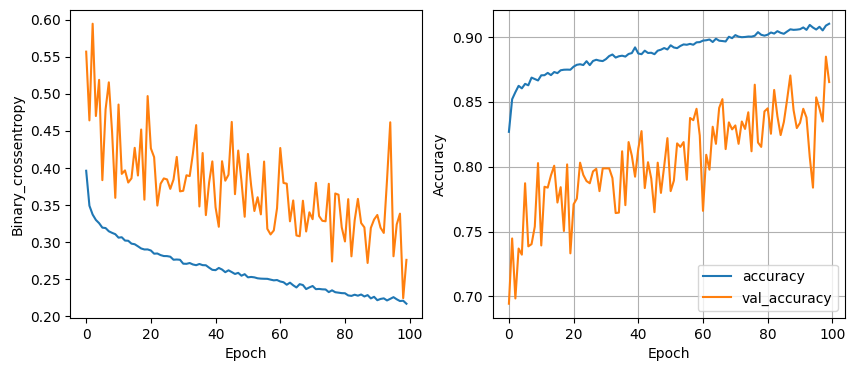

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8626 - loss: 0.3813
64 nodes,0 dropout,0.005 learning rate,64 batch size


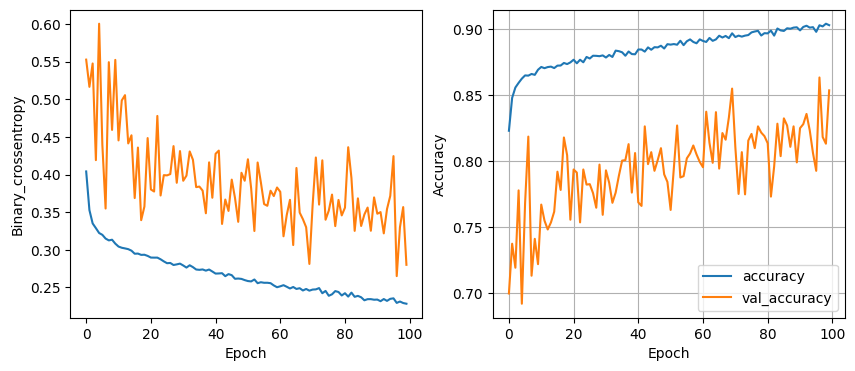

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8603 - loss: 0.3578
64 nodes,0 dropout,0.005 learning rate,128 batch size


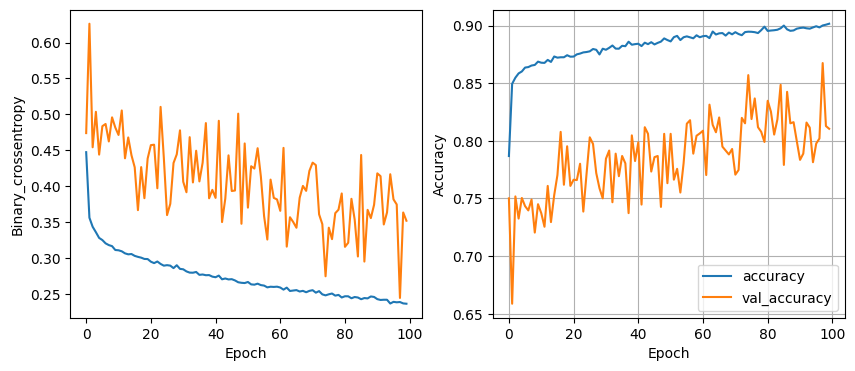

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8639 - loss: 0.3505
64 nodes,0 dropout,0.001 learning rate,32 batch size


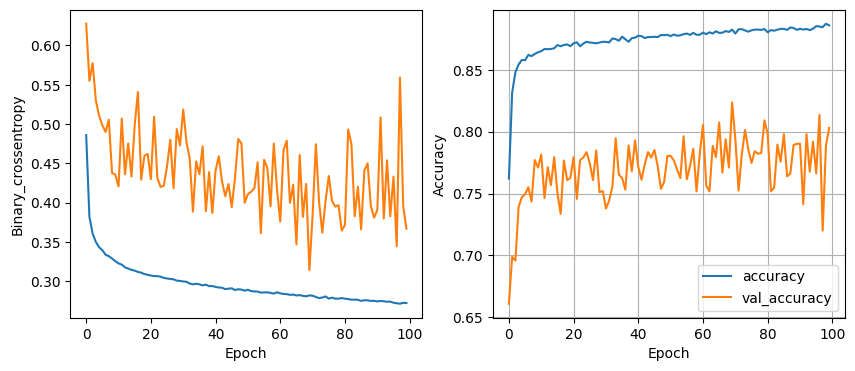

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8695 - loss: 0.3235
64 nodes,0 dropout,0.001 learning rate,64 batch size


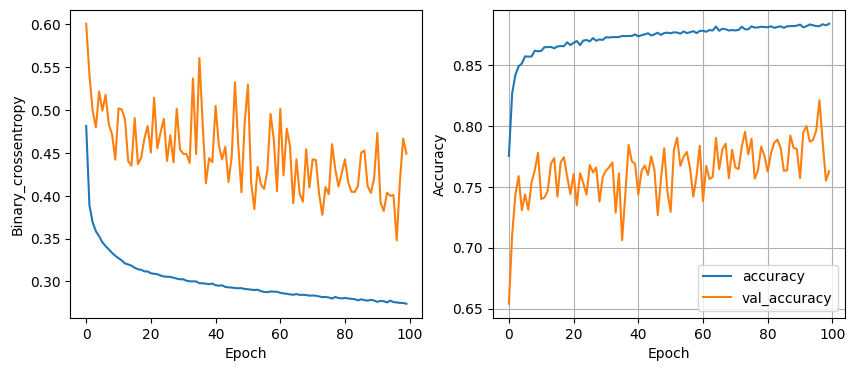

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8686 - loss: 0.3200
64 nodes,0 dropout,0.001 learning rate,128 batch size


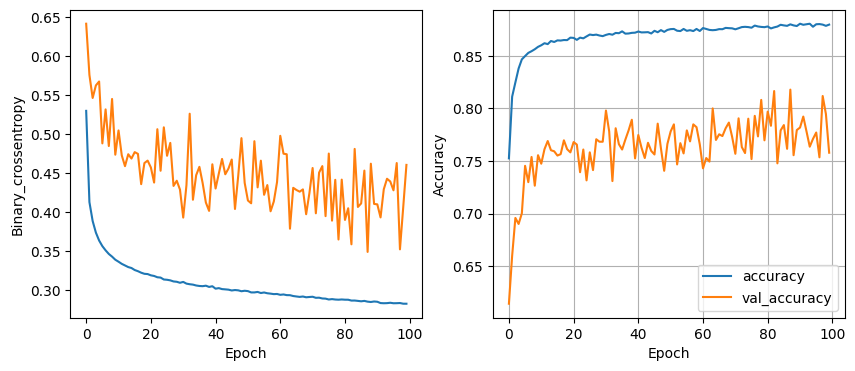

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8667 - loss: 0.3193
64 nodes,0.2 dropout,0.01 learning rate,32 batch size


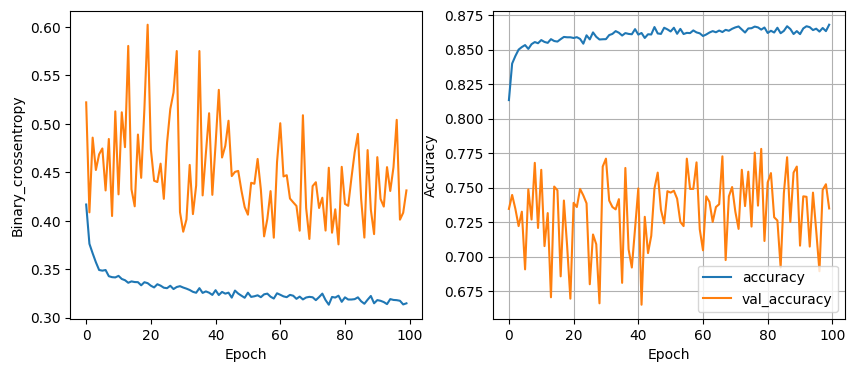

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8714 - loss: 0.3099
64 nodes,0.2 dropout,0.01 learning rate,64 batch size


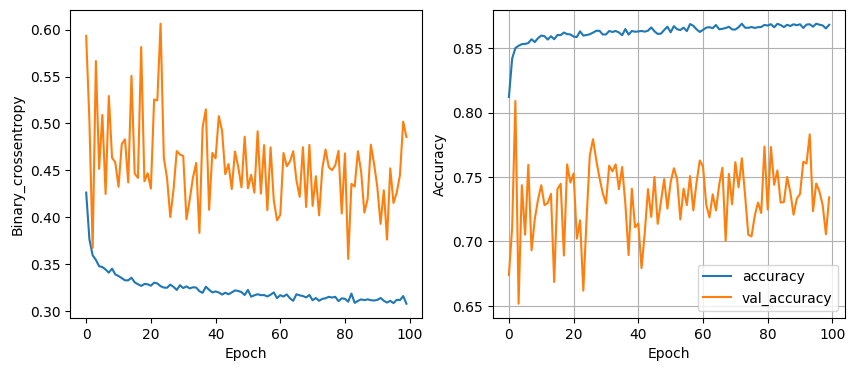

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8647 - loss: 0.3115
64 nodes,0.2 dropout,0.01 learning rate,128 batch size


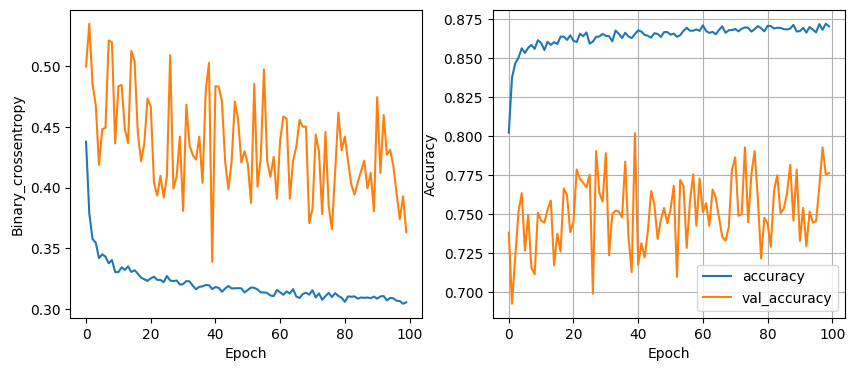

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8701 - loss: 0.3141
64 nodes,0.2 dropout,0.005 learning rate,32 batch size


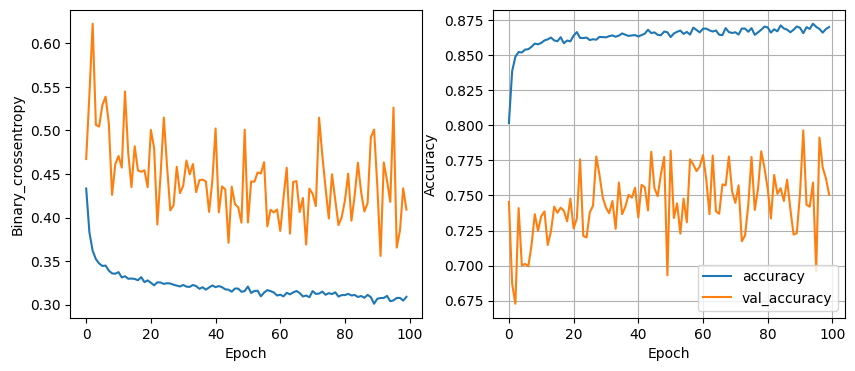

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8672 - loss: 0.3120
64 nodes,0.2 dropout,0.005 learning rate,64 batch size


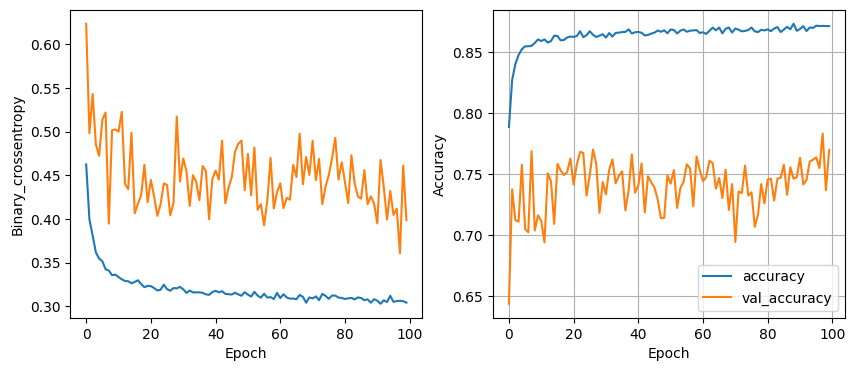

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8739 - loss: 0.3040
64 nodes,0.2 dropout,0.005 learning rate,128 batch size


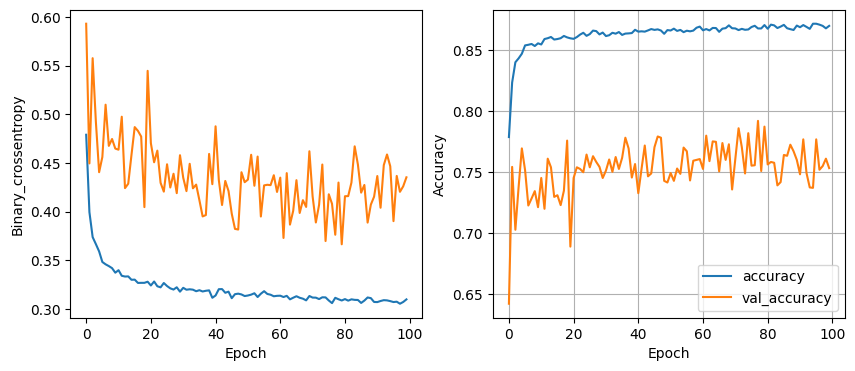

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8657 - loss: 0.3187
64 nodes,0.2 dropout,0.001 learning rate,32 batch size


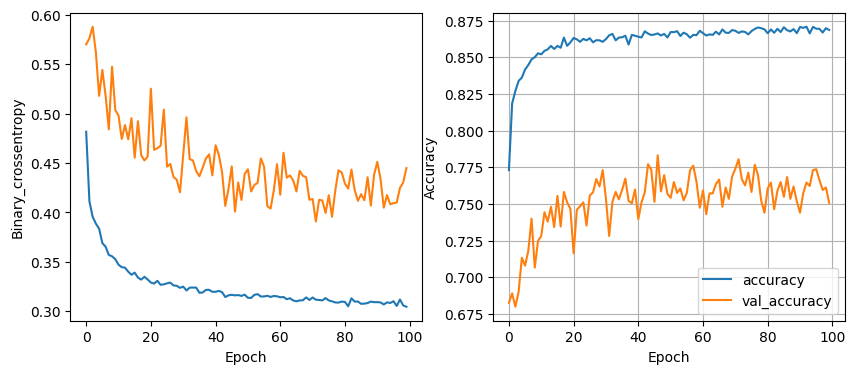

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8673 - loss: 0.3105
64 nodes,0.2 dropout,0.001 learning rate,64 batch size


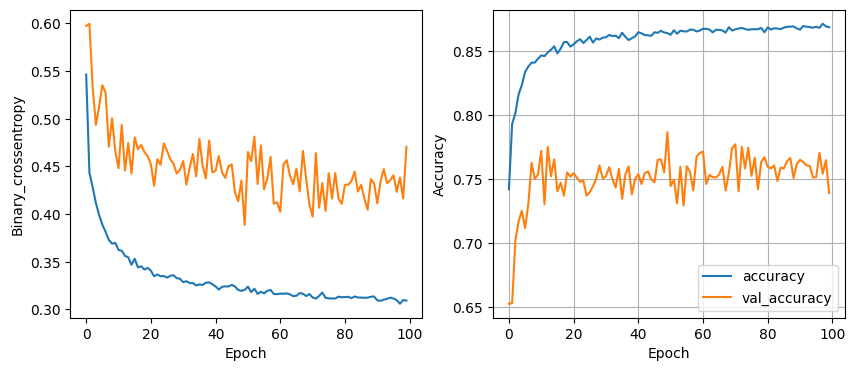

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8715 - loss: 0.3139
64 nodes,0.2 dropout,0.001 learning rate,128 batch size


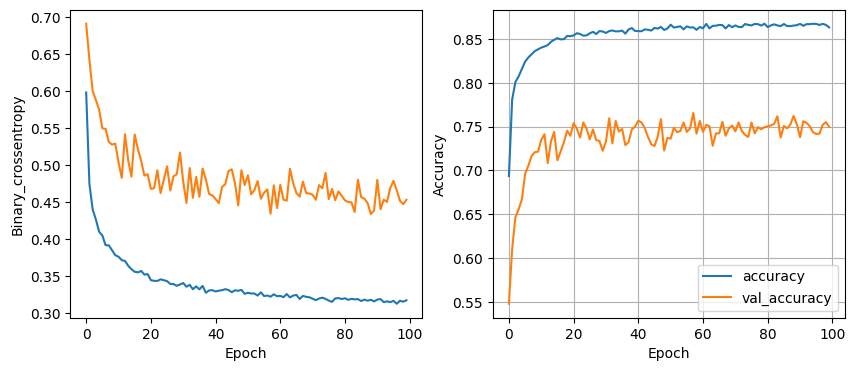

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8638 - loss: 0.3157


In [ ]:
# define a validation loss var and set it to infinity
least_val_loss = float('inf')
# define a loss var and set it to none
least_loss_model = None
# loop using your criteria values for the arguments
epochs =100
for num_nodes in [16,32,64]:
  for dropout_prob in [0,0.2]:
    for learn_rate in [0.01,0.005,0.001]:
            for batch_size in [32,64,128]:
              print(f"{num_nodes} nodes,{dropout_prob} dropout,{learn_rate} learning rate,{batch_size} batch size")
              model,history = train_model(x_train,y_train,num_nodes,batch_size,epochs,learn_rate,dropout_prob)
              plot_history(history)
              val_loss = model.evaluate(x_valid,y_valid)
              if isinstance(val_loss, list):
                val_loss = val_loss[0]
              # Extract float if val_loss is a list
              if val_loss < least_val_loss:
                  least_val_loss = val_loss
                  least_loss_model = model

In [ ]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1333
           1       0.88      0.95      0.91      2471

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.88      3804

